In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
a=pd.read_csv(r'Customer_DF.csv')
b=pd.read_csv(r'cust_transaction_details.csv')
df=pd.DataFrame(a)
df1=pd.DataFrame(b)

In [ ]:
df

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,1yf0@jedyz63t,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,3fooiar@6eph,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,9es7t@u6n7x,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,abigail08@yahoo.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True
...,...,...,...,...,...,...,...,...,...,...
163,163,ybrown@gmail.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True
164,164,ypruitt@hotmail.com,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True
165,165,zbennett@frazier.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True
166,166,zgraham@yahoo.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True


In [ ]:
df1

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,1yf0@jedyz63t,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,1yf0@jedyz63t,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,1yf0@jedyz63t,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,1yf0@jedyz63t,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,1yf0@jedyz63t,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...
618,618,zgraham@yahoo.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
619,619,zgraham@yahoo.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
620,620,zgraham@yahoo.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
621,621,zgraham@yahoo.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled


In [ ]:
df.columns

Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud'],
      dtype='object')

In [ ]:
def strat(l):
    if 'x' in l:
        return 1
    else:
        return 0
    

In [ ]:
df['FraudNo']=df['customerPhone'].apply(strat)
df.head()


,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,FraudNo
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0
1,1,1yf0@jedyz63t,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,0
2,2,3fooiar@6eph,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,0
3,3,9es7t@u6n7x,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,1
4,4,abigail08@yahoo.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,0


In [ ]:
def strat1(x):
    extn=['yahoo.com','gmail.com','hotmail.com']
    m=x[(x.index('@')+1):]
    if m not in extn:
        return 1
    elif m[(m.index('.')+1):] not in ['org','net','com','biz','info']:
        return 1
    else:
        return 0
    


In [ ]:
df['FraudID']=df['customerEmail'].apply(strat1)

In [ ]:
df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,FraudNo,FraudID
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,0
1,1,1yf0@jedyz63t,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,0,1
2,2,3fooiar@6eph,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,0,1
3,3,9es7t@u6n7x,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,1,1
4,4,abigail08@yahoo.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,0,0


In [ ]:
for i in df['Fraud']:
    print(type(i))
    break

<class 'bool'>


In [ ]:
def strat2(x):
    if x is False:
        return 0
    else:
        return 1

In [ ]:
df['Fraud']=df['Fraud'].apply(strat2)

In [ ]:
df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,FraudNo,FraudID
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0,0
1,1,1yf0@jedyz63t,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,0,1
2,2,3fooiar@6eph,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,0,1
3,3,9es7t@u6n7x,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,1,1
4,4,abigail08@yahoo.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,0,0


In [ ]:
df1.columns

Index(['Unnamed: 0', 'customerEmail', 'transactionId', 'orderId',
       'paymentMethodId', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
       'transactionFailed', 'orderState'],
      dtype='object')

In [ ]:
df1.head()


,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,1yf0@jedyz63t,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,1yf0@jedyz63t,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,1yf0@jedyz63t,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,1yf0@jedyz63t,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,1yf0@jedyz63t,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [ ]:
df1


,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,1yf0@jedyz63t,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,1yf0@jedyz63t,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,1yf0@jedyz63t,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,1yf0@jedyz63t,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,1yf0@jedyz63t,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...
618,618,zgraham@yahoo.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
619,619,zgraham@yahoo.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
620,620,zgraham@yahoo.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
621,621,zgraham@yahoo.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled


In [ ]:
df.customerEmail.unique().shape


(161,)

In [ ]:
df1.customerEmail.unique().shape

(136,)

In [ ]:
df['Is_Duplicate_Name'] = df['customerEmail'].apply(lambda x: 1 if (df[df.customerEmail==x]['customerEmail'].shape[0]>1) else 0)
df['Is_Duplicate_IP'] = df['customerIPAddress'].apply(lambda x: 1 if (df[df.customerIPAddress==x]['customerIPAddress'].shape[0]>1) else 0)
df['Is_Duplicate_Address'] = df['customerBillingAddress'].apply(lambda x: 1 if (df[df.customerBillingAddress==x]['customerBillingAddress'].shape[0]>1) else 0)

In [ ]:
df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,FraudNo,FraudID,Is_Duplicate_Name,Is_Duplicate_IP,Is_Duplicate_Address
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0,0,0,0,0
1,1,1yf0@jedyz63t,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,0,1,0,0,0
2,2,3fooiar@6eph,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,0,1,0,0,0
3,3,9es7t@u6n7x,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,1,1,0,0,0
4,4,abigail08@yahoo.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,0,0,0,0,0


In [ ]:
df[df.No_Payments==0]

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,FraudNo,FraudID,Is_Duplicate_Name,Is_Duplicate_IP,Is_Duplicate_Address
34,34,cookbenjamin@hotmail.com,995.449.5115x498,zxdd5co6f5pylq9it4x0,e03d:db6e:f5ca:b9cd:d64f:80fe:6177:26e1,89773 Peterson Course Suite 625\nEast Amandabo...,0,0,0,0,1,0,0,0,0
38,38,dana09@yahoo.com,592.309.4963x427,1qj6z7funp3l28ym8trh,7891:9f08:9ac6:c816:7c58:26cd:ff2c:7ddc,"139 Ramirez Island Suite 885\nNew Joan, MT 69993",0,0,0,0,1,0,0,0,0
44,44,dawn05@tucker-brown.com,+23(4)1428642270,nf0i429dh2h2fmf287ec,20.34.8.37,"32514 Freeman Court\nPort Waltermouth, SC 34012",0,0,0,0,0,1,0,0,0
47,47,emilyroberts@hotmail.com,1-670-969-5075x27186,yqt388sj7f142rohzukc,172.191.99.44,"6395 Christopher Lakes Suite 062\nSouth Dana, ...",0,0,0,0,1,0,0,0,0
54,54,gomezjohn@yahoo.com,731.957.1783x62296,7p70n6q6zbgfhiqqqsxy,ad37:7b02:70fb:4b74:bc77:cd13:1bed:2483,"01494 Anderson Corners Suite 314\nDaviston, SC...",0,0,0,0,1,0,0,0,0
70,70,johnlowery@gmail.com,800.814.4655x012,132m3ourosp5a28ksvou,188.74.171.130,"08645 Alvarado Way Suite 514\nMillerfurt, AL 8...",0,0,0,0,1,0,1,0,0
125,125,richard05@hanson-key.org,1-627-545-5097x7356,z0uxvp8sio7nyv7op58j,1b75:d451:c48a:12:cfc7:bc1e:d748:ee62,"4873 Perez Groves\nWest Gregoryburgh, NH 45193...",0,0,0,0,1,1,0,0,0
133,133,smithtiffany@davis-perkins.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,1,0,1,0,0,0
137,137,stephanie21@reyes-spencer.biz,990.862.5466x7247,r526953keh7ctxcf9lnh,96eb:8d53:678:53ba:599b:5db6:3fe3:3218,"31068 Vance Forks Suite 516\nNew Christopher, ...",0,0,0,0,1,1,0,0,0
139,139,suzanne21@gmail.com,1-512-954-5541,dgfa5pe2t45d1u6ox33l,118e:7887:94b6:b2a7:d2ad:8f35:c241:3149,"25653 Key Gateway\nPort Robert, PA 64370",0,0,0,0,0,0,0,0,0


In [ ]:
import re
def ret_trn_fail_ord_success(x):
    cust_dict={}
    for det in df1[(df1.customerEmail==x) & (df1.orderState=='fulfilled') & (df1.transactionFailed==1)].iterrows():
        
        if not df1[(df1.customerEmail==det[1].customerEmail) & (df1.orderId==det[1].orderId) &
                                 (df1.transactionFailed==0)]['customerEmail'].count()>0:
         
            cust_dict[det[1].orderId]=1
    return len(cust_dict)

def ret_pay_counts(x):
    import pandas as pd
    lst1=[]
    for i in ['card', 'bitcoin', 'apple pay', 'paypal']:
        lst1.append(df1[(df1.customerEmail==x) &(df1.paymentMethodType==i) & (df1.paymentMethodRegistrationFailure==False)].shape[0])
    return pd.Series(lst1)

In [ ]:
df['No_Failed_Orders'] = df['customerEmail'].apply(lambda x: df1[(df1.orderState=='failed') & (df1.customerEmail==x)]['orderId'].count())
df['No_Success_Orders'] = df['customerEmail'].apply(lambda x: df1[(df1.orderState=='fulfilled') & (df1.customerEmail==x)]['orderId'].count())
df['No_Pending_Orders'] = df['customerEmail'].apply(lambda x: df1[(df1.orderState=='pending') & (df1.customerEmail==x)]['orderId'].count())

In [ ]:
df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,FraudNo,FraudID,Is_Duplicate_Name,Is_Duplicate_IP,Is_Duplicate_Address,No_Failed_Orders,No_Success_Orders,No_Pending_Orders
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0,0,0,0,0,0,2,0
1,1,1yf0@jedyz63t,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,0,1,0,0,0,1,8,1
2,2,3fooiar@6eph,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,0,1,0,0,0,0,0,0
3,3,9es7t@u6n7x,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,1,1,0,0,0,0,2,0
4,4,abigail08@yahoo.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,0,0,0,0,0,1,4,0


In [ ]:
df['No_Pending_Orders'] = df['customerEmail'].apply(lambda x: df1[(df1.orderState=='pending') & (df1.customerEmail==x)]['orderId'].count())
df['Trn_Failed_Ord_Fulfil'] = df1['customerEmail'].apply(lambda x: ret_trn_fail_ord_success(x))


In [ ]:
df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,FraudNo,FraudID,Is_Duplicate_Name,Is_Duplicate_IP,Is_Duplicate_Address,No_Failed_Orders,No_Success_Orders,No_Pending_Orders,Trn_Failed_Ord_Fulfil
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0,0,0,0,0,0,2,0,1
1,1,1yf0@jedyz63t,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,0,1,0,0,0,1,8,1,1
2,2,3fooiar@6eph,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,0,1,0,0,0,0,0,0,1
3,3,9es7t@u6n7x,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,1,1,0,0,0,0,2,0,1
4,4,abigail08@yahoo.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,0,0,0,0,0,1,4,0,1


In [ ]:
df[['card', 'bitcoin', 'apple pay', 'paypal']] = df['customerEmail'].apply(lambda x: ret_pay_counts(x))

In [ ]:
df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Is_Duplicate_IP,Is_Duplicate_Address,No_Failed_Orders,No_Success_Orders,No_Pending_Orders,Trn_Failed_Ord_Fulfil,card,bitcoin,apple pay,paypal
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,...,0,0,0,2,0,1,1,0,0,0
1,1,1yf0@jedyz63t,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,...,0,0,1,8,1,1,5,2,0,0
2,2,3fooiar@6eph,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,...,0,0,0,0,0,1,0,0,0,0
3,3,9es7t@u6n7x,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,...,0,0,0,2,0,1,2,0,0,0
4,4,abigail08@yahoo.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,...,0,0,1,4,0,1,4,0,1,0


In [ ]:
df['No_Success_Payement_Reg'] = df['customerEmail'].apply(lambda x:df[(df.customerEmail==x) & (df1.paymentMethodRegistrationFailure==False)].shape[0])

C:\Users\mejpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Is_Duplicate_Address,No_Failed_Orders,No_Success_Orders,No_Pending_Orders,Trn_Failed_Ord_Fulfil,card,bitcoin,apple pay,paypal,No_Success_Payement_Reg
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,...,0,0,2,0,1,1,0,0,0,0
1,1,1yf0@jedyz63t,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,...,0,1,8,1,1,5,2,0,0,0
2,2,3fooiar@6eph,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,...,0,0,0,0,1,0,0,0,0,1
3,3,9es7t@u6n7x,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,...,0,0,2,0,1,2,0,0,0,1
4,4,abigail08@yahoo.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,...,0,1,4,0,1,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,ybrown@gmail.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,1,...,0,0,5,0,0,3,2,0,0,1
164,164,ypruitt@hotmail.com,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,1,...,0,0,4,0,0,3,0,0,1,1
165,165,zbennett@frazier.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,1,...,0,0,0,0,0,0,0,0,0,1
166,166,zgraham@yahoo.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,1,...,0,0,5,0,0,3,0,0,2,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud', 'FraudNo', 'FraudID',
       'Is_Duplicate_Name', 'Is_Duplicate_IP', 'Is_Duplicate_Address',
       'No_Failed_Orders', 'No_Success_Orders', 'No_Pending_Orders',
       'Trn_Failed_Ord_Fulfil', 'card', 'bitcoin', 'apple pay', 'paypal',
       'No_Success_Payement_Reg'],
      dtype='object')

In [ ]:
data = df[['No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud', 'FraudNo', 'FraudID',
       'Is_Duplicate_Name', 'Is_Duplicate_IP', 'Is_Duplicate_Address',
       'No_Failed_Orders', 'No_Success_Orders', 'No_Pending_Orders',
       'Trn_Failed_Ord_Fulfil', 'card', 'bitcoin', 'apple pay', 'paypal',
       'No_Success_Payement_Reg']].copy()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Fraud'], data[['Fraud']],
                                                    test_size=0.4,
                                                    random_state=0,
                                                    stratify=data[['Fraud']])

In [ ]:
def tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_xgb=False):
    grid = GridSearchCV(model, parameters, cv = 3, scoring = 'f1_macro',return_train_score=True)
    grid.fit(train_data_x, train_data_y)
    
    
    results = pd.DataFrame(grid.cv_results_)
    results.columns
    params = results['params']                         
    score_tr_array = results['mean_train_score']         
    score_cv_array = results['mean_test_score'] 
    for i in range(len(params)):
        print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
    
    
    print('Best Parameter is ',  grid.best_params_)
    print('Best F1 Score is ',  grid.best_score_)
    if not is_xgb:
        plt.xlabel(parameter_name)
        plt.title('Cross Validation')
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
        plt.legend(['Train Accuracy', 'CV Accuracy'])
        plt.show()
    
    return grid.best_params_

C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

For {'n_estimators': 100}  acc of Train data is 1.0 and acc of CV data is 0.5854668227873456
For {'n_estimators': 150}  acc of Train data is 1.0 and acc of CV data is 0.6033965180063943
For {'n_estimators': 200}  acc of Train data is 1.0 and acc of CV data is 0.586124015395632
For {'n_estimators': 250}  acc of Train data is 1.0 and acc of CV data is 0.6019510962279648
For {'n_estimators': 300}  acc of Train data is 1.0 and acc of CV data is 0.5788791837750406
Best Parameter is  {'n_estimators': 150}
Best F1 Score is  0.6033965180063943


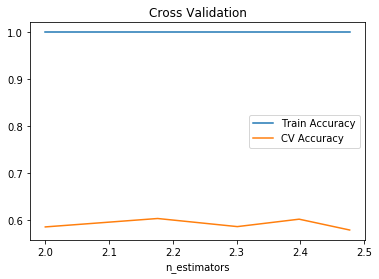

Accuracy of model on testing data is 0.7794117647058824
F1 Score of model on testing data is 0.7303727200634417
Log loss of model on testing data is 0.5407782950713236


C:\Users\mejpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [ ]:
model=RandomForestClassifier()
alpha = [100,150,200,250,300]
alphas = {'n_estimators' : alpha}
best_params = tuning(model, alphas, 'n_estimators', x_train, y_train, alpha)

best_alpha = best_params['n_estimators']
clf = RandomForestClassifier(n_estimators=best_alpha).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\linear_m

For {'C': 1e-05}  acc of Train data is 0.39023569023569027 and acc of CV data is 0.3902380952380953
For {'C': 0.0001}  acc of Train data is 0.39023569023569027 and acc of CV data is 0.3902380952380953
For {'C': 0.001}  acc of Train data is 0.41832255794519946 and acc of CV data is 0.3902380952380953
For {'C': 0.01}  acc of Train data is 0.5460956029921548 and acc of CV data is 0.5156700244200245
For {'C': 0.1}  acc of Train data is 0.659241188633675 and acc of CV data is 0.6089211168449072
For {'C': 1}  acc of Train data is 0.7067340888979136 and acc of CV data is 0.5247684610075914
For {'C': 10}  acc of Train data is 0.7217213658596902 and acc of CV data is 0.519691699604743
For {'C': 100}  acc of Train data is 0.7029483454237245 and acc of CV data is 0.519691699604743
For {'C': 1000}  acc of Train data is 0.6891467685786695 and acc of CV data is 0.49684584980237156
For {'C': 10000}  acc of Train data is 0.6891467685786695 and acc of CV data is 0.49684584980237156
Best Parameter is  {

C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\utils\v

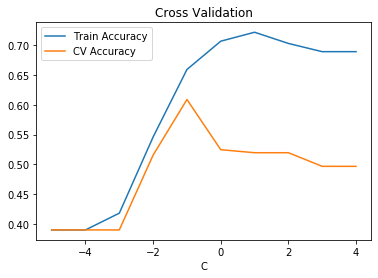

Accuracy of model on testing data is 0.7352941176470589
F1 Score of model on testing data is 0.6713211600429645
Log loss of model on testing data is 0.5609993450788193


C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mejpr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model = LogisticRegression()
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', x_train, y_train, alpha)

best_alpha = best_params['C']
clf = LogisticRegression(C = best_alpha).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)